In [ ]:
# Heart Disease prediction using multiple patient record data - Aarond D.
# MVP Concept using multiple data sources that should contain information 
# that are well-known factors for coronary heart disease. E.g. Cholesterol, chest pains, glucose levels, smoking, bmi etc.
# Limited to 2007-2008 in this exploration. Can add data from other years if found feasible.
# Root source: https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2007

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# get dataset for patients who answered if they have had heart disease
df_hd = pd.read_csv('has_heart_disease.csv', index_col=0)

In [3]:
df_hd

,SEQN,HasHeartDisease
0,41475.0,0
2,41477.0,0
4,41479.0,0
6,41481.0,0
7,41482.0,0
...,...,...
9660,51618.0,0
9661,51619.0,0
9662,51620.0,0
9664,51622.0,0


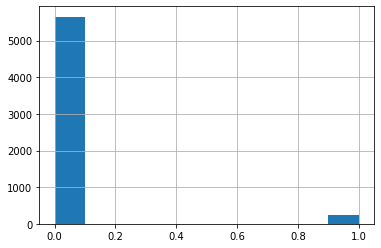

In [4]:
df_hd.HasHeartDisease.hist()
plt.show()

In [5]:
df_hd[df_hd.HasHeartDisease == 1].count()

SEQN               253
HasHeartDisease    253
dtype: int64

### Gather datasets that contains factors that associate with heart disease such as smoking, blood pressure, exercise, has diabetes, cholesterol levels, bmi, age.

In [6]:
# body measurements (BMI, height, waist)
df_bmx = pd.read_sas('BMX_E.XPT')
# Blood pressure
df_bpx = pd.read_sas('BPX_E.XPT')
# Diabetes Questionnaire (Get if they've been diagnosed for diabetes)
df_dpq = pd.read_sas('DPQ_E.XPT')
# Physical Activity
df_paq = pd.read_sas('PAQ_E.XPT')
# Smoking Questionnaire (Do they smoke?)
df_smq = pd.read_sas('SMQ_E.XPT')
# Cholesterol Measurements
df_tchol = pd.read_sas('TCHOL_E.XPT')
# Glucose Measurements (fasting)
df_glu = pd.read_sas('GLU_E.XPT')
# Cardiovascular health questionnaire (Pains in chest, other places)
df_cdq = pd.read_sas('CDQ_E.XPT')
# Lipoprotein Measurements (lipoprotein a in high levels is a good indicator for heart disease)
df_apob = pd.read_sas('APOB_E.XPT')

In [7]:
df_master = df_hd.merge(df_bmx, on='SEQN', how='inner')

In [8]:
df_master = df_master.merge(df_bpx, on='SEQN', how='inner')

In [9]:
df_master = df_master.merge(df_dpq, on='SEQN', how='inner')
df_master = df_master.merge(df_paq, on='SEQN', how='inner')
df_master = df_master.merge(df_smq, on='SEQN', how='inner')
df_master = df_master.merge(df_tchol, on='SEQN', how='inner')
df_master = df_master.merge(df_glu, on='SEQN', how='inner')
df_master = df_master.merge(df_cdq, on='SEQN', how='inner')
df_master = df_master.merge(df_apob, on='SEQN', how='inner')

In [10]:
df_master

,SEQN,HasHeartDisease,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,...,CDQ009D,CDQ009E,CDQ009F,CDQ009G,CDQ009H,CDQ008,CDQ010,WTSAF2YR_y,LBXAPB,LBDAPBSI
0,41479.0,0,1.0,65.7,NaN,NaN,NaN,NaN,NaN,154.4,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,19983.600,94.0,0.94
1,41486.0,0,1.0,86.2,NaN,NaN,NaN,NaN,NaN,166.2,...,NaN,NaN,NaN,NaN,NaN,2.0,2.0,14923.772,114.0,1.14
2,41489.0,0,1.0,91.8,NaN,NaN,NaN,NaN,NaN,158.4,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,62836.776,78.0,0.78
3,41492.0,0,1.0,82.6,NaN,NaN,NaN,NaN,NaN,168.7,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,24528.124,80.0,0.80
4,41494.0,0,1.0,70.5,NaN,NaN,NaN,NaN,NaN,166.4,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,30419.329,114.0,1.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1888,51616.0,0,3.0,142.6,NaN,NaN,NaN,NaN,NaN,183.4,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,144245.174,77.0,0.77
1889,51617.0,0,1.0,77.9,NaN,NaN,NaN,NaN,NaN,158.6,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,13793.506,65.0,0.65
1890,51618.0,0,1.0,90.6,NaN,NaN,NaN,NaN,NaN,173.9,...,NaN,NaN,NaN,NaN,NaN,2.0,2.0,222015.079,87.0,0.87
1891,51620.0,0,1.0,72.2,NaN,NaN,NaN,NaN,NaN,159.7,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,54704.610,125.0,1.25


In [11]:
df_master.corr()['HasHeartDisease'].abs().sort_values(ascending=False)[0:50]

HasHeartDisease    1.000000
SMD650             0.282488
CDQ008             0.217895
CDQ009A            0.206725
CDQ001             0.179123
LBDTCSI            0.174024
LBXTC              0.173956
CDQ010             0.144957
BMITRI             0.138940
SMD057             0.129460
DPQ040             0.126722
CDQ002             0.124203
LBDAPBSI           0.107755
LBXAPB             0.107755
CDQ003             0.105283
SMD100FL           0.103678
BMIWT              0.098556
BPXPULS            0.094682
PAQ610             0.091961
BMXARML            0.088399
BMXWAIST           0.086309
LBDGLUSI           0.083030
LBXGLU             0.083030
SMD093             0.080550
BPXPLS             0.077186
SMQ020             0.075959
SMQ077             0.075234
PAQ655             0.072878
CDQ005             0.071260
PEASCCT1           0.067874
BPXDI1             0.067484
SMQ040             0.067469
DPQ030             0.067097
BPXML1             0.066860
DPQ090             0.066424
DPQ050             0

* SMD650 is cigarettes smoked per day.
* CDQ008 is severe chest pains for more than 30 mins.
* CDQ009A is pain in right arm
* CDQ001 is pain or discomfort in chest ever
* LBXTC and LBDTCSI are total cholesterol levels measured (use former)
* LBXAPB and LBDAPBSI are total lipoprotein a levels measured (use former)
* BPXPULS is pulse regular or irregular
* Surprisingly blood pressure measurements BPXSY1-4 and BPXDI1-4 are not highly ocrrelated with BPXDI1 the highest at 6.7%.
* PAQ610 is days of vigorous work. PAQ655 is days of vigorous recreational activity.
* BMXWAIST is Waist measurement
* DPQ040 is feeling tired or lack of energy (fatigue)

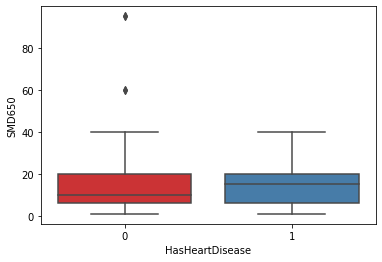

In [12]:
sns.boxplot(x="HasHeartDisease", y="SMD650", data=df_master[df_master['SMD650']<600], palette="Set1")
plt.show()

In [13]:
# SMD650 = cigs/day smoked in past 30 days
# Median clearly differs,
# might need to create new attribute for cigarettes or significant smoker where #cigs > 1 a day or just smokes even.

In [14]:
def smokes(row):
    if row['SMD650'] > 0:
        return 1
    else:
        return 0

In [15]:
df_master['IsSmoker'] = df_master.apply(lambda row: smokes(row), axis=1)

<AxesSubplot:>

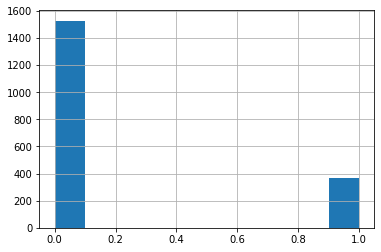

In [16]:
df_master['IsSmoker'].hist()

In [17]:
df_master.corr()['HasHeartDisease']['IsSmoker']

-0.007305514549348158

In [18]:
# Will investigate this further later

In [25]:
df_tchol

,SEQN,LBXTC,LBDTCSI
0,41475.0,179.0,4.63
1,41476.0,143.0,3.70
2,41477.0,191.0,4.94
3,41479.0,188.0,4.86
4,41480.0,NaN,NaN
...,...,...,...
8127,51619.0,220.0,5.69
8128,51620.0,244.0,6.31
8129,51621.0,128.0,3.31
8130,51622.0,208.0,5.38


In [26]:
# Let's try train a model with the top features we have as is to see if it's feasible to predict for risk of heart disease

In [ ]:
* SMD650 is cigarettes smoked per day.
* CDQ008 is severe chest pains for more than 30 mins.
* CDQ009A is pain in right arm
* CDQ001 is pain or discomfort in chest ever
* LBXTC and LBDTCSI are total cholesterol levels measured (use former)
* LBXAPB and LBDAPBSI are total lipoprotein a levels measured (use former)
* BPXPULS is pulse regular or irregular
* Surprisingly blood pressure measurements BPXSY1-4 and BPXDI1-4 are not highly ocrrelated with BPXDI1 the highest at 6.7%.
* PAQ610 is days of vigorous work. PAQ655 is days of vigorous recreational activity.
* BMXWAIST is Waist measurement
* DPQ040 is feeling tired or lack of energy (fatigue)

In [28]:
features_at_risk = ['SMD650', 'CDQ008', 'CDQ009A', 'CDQ001', 'LBXTC', 'LBXAPB', 'BPXPULS', 'PAQ610', 'BMXWAIST', 'DPQ040']

In [35]:
df_master[features_at_risk].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMD650    366 non-null    float64
 1   CDQ008    515 non-null    float64
 2   CDQ009A   14 non-null     float64
 3   CDQ001    1892 non-null   float64
 4   LBXTC     1790 non-null   float64
 5   LBXAPB    1786 non-null   float64
 6   BPXPULS   1820 non-null   float64
 7   PAQ610    307 non-null    float64
 8   BMXWAIST  1774 non-null   float64
 9   DPQ040    1727 non-null   float64
dtypes: float64(10)
memory usage: 162.7 KB


In [44]:
# will need to drop CDQ009A, PAQ610 and see how many patients we can have left while using these features
# just temporarily removed smoking to increase sample size again

In [75]:
features_at_risk = ['CDQ008', 'CDQ001', 'LBXTC', 'LBXAPB', 'BPXPULS', 'BMXWAIST', 'DPQ040', 'HasHeartDisease']

In [76]:
df_master[features_at_risk].dropna()

,CDQ008,CDQ001,LBXTC,LBXAPB,BPXPULS,BMXWAIST,DPQ040,HasHeartDisease
1,2.0,1.0,194.0,114.0,1.0,97.0,5.397605e-79,0
5,2.0,1.0,168.0,86.0,1.0,106.9,3.000000e+00,0
6,2.0,1.0,149.0,59.0,1.0,95.5,1.000000e+00,0
25,1.0,1.0,205.0,114.0,2.0,95.0,3.000000e+00,0
37,2.0,1.0,205.0,85.0,1.0,88.9,1.000000e+00,0
...,...,...,...,...,...,...,...,...
1862,2.0,1.0,226.0,116.0,1.0,119.5,3.000000e+00,0
1866,1.0,1.0,202.0,59.0,1.0,78.6,5.397605e-79,0
1879,1.0,1.0,200.0,86.0,1.0,104.3,2.000000e+00,1
1880,1.0,1.0,196.0,100.0,1.0,116.5,1.000000e+00,0


<AxesSubplot:>

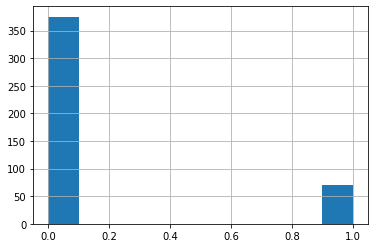

In [77]:
df_master[features_at_risk].dropna().HasHeartDisease.hist()

In [78]:
# With fear of losing sample size by dropping more features (lost physical activity and pains or discomfort)
# Will run model accuracy on these small set to see if viable.
# If it is somewhat viable, we can grab more data as we have only grabbed data from 2007-2008 patients.

In [79]:
df_small = df_master[features_at_risk].dropna()

In [80]:
df_small

,CDQ008,CDQ001,LBXTC,LBXAPB,BPXPULS,BMXWAIST,DPQ040,HasHeartDisease
1,2.0,1.0,194.0,114.0,1.0,97.0,5.397605e-79,0
5,2.0,1.0,168.0,86.0,1.0,106.9,3.000000e+00,0
6,2.0,1.0,149.0,59.0,1.0,95.5,1.000000e+00,0
25,1.0,1.0,205.0,114.0,2.0,95.0,3.000000e+00,0
37,2.0,1.0,205.0,85.0,1.0,88.9,1.000000e+00,0
...,...,...,...,...,...,...,...,...
1862,2.0,1.0,226.0,116.0,1.0,119.5,3.000000e+00,0
1866,1.0,1.0,202.0,59.0,1.0,78.6,5.397605e-79,0
1879,1.0,1.0,200.0,86.0,1.0,104.3,2.000000e+00,1
1880,1.0,1.0,196.0,100.0,1.0,116.5,1.000000e+00,0


In [81]:
x = df_small[df_small.columns[:-1]]

In [82]:
x

,CDQ008,CDQ001,LBXTC,LBXAPB,BPXPULS,BMXWAIST,DPQ040
1,2.0,1.0,194.0,114.0,1.0,97.0,5.397605e-79
5,2.0,1.0,168.0,86.0,1.0,106.9,3.000000e+00
6,2.0,1.0,149.0,59.0,1.0,95.5,1.000000e+00
25,1.0,1.0,205.0,114.0,2.0,95.0,3.000000e+00
37,2.0,1.0,205.0,85.0,1.0,88.9,1.000000e+00
...,...,...,...,...,...,...,...
1862,2.0,1.0,226.0,116.0,1.0,119.5,3.000000e+00
1866,1.0,1.0,202.0,59.0,1.0,78.6,5.397605e-79
1879,1.0,1.0,200.0,86.0,1.0,104.3,2.000000e+00
1880,1.0,1.0,196.0,100.0,1.0,116.5,1.000000e+00


In [83]:
y = df_small['HasHeartDisease']

In [84]:
y

1       0
5       0
6       0
25      0
37      0
       ..
1862    0
1866    0
1879    1
1880    0
1890    0
Name: HasHeartDisease, Length: 445, dtype: int64

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, \
    classification_report
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [86]:
models = [('LR', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('SVR', SVC(gamma='auto')),
          ('GB',GradientBoostingClassifier())]

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR: 0.849394 (0.038773)
KNN: 0.820152 (0.036298)
CART: 0.759596 (0.061760)
RF: 0.833687 (0.055126)
SVR: 0.842677 (0.048951)
GB: 0.831414 (0.062600)


In [87]:
# LR
train, test = train_test_split(df_small, test_size=0.3, random_state=0, stratify=y)
train_x = train[train.columns[:-1]]
test_x = test[test.columns[:-1]]
train_y = train['HasHeartDisease']
test_y = test['HasHeartDisease']

lr_model = LogisticRegression()

lr_model.fit(train_x, train_y)

prediction = lr_model.predict(test_x)

metrics.accuracy_score(prediction, test_y)

metrics.confusion_matrix(prediction, test_y)

array([[111,  21],
       [  2,   0]])

In [88]:
cart_model = DecisionTreeClassifier()

cart_model.fit(train_x, train_y)

prediction_cart = cart_model.predict(test_x)

metrics.accuracy_score(prediction_cart, test_y)

metrics.confusion_matrix(prediction_cart, test_y)

array([[98, 15],
       [15,  6]])